## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   4.917401  1454.694543  0.447695  1.941752  1.374786
1  60.563769  1336.597037  0.281505  9.420745  1.612788
2  34.061345  1647.599671  0.337865  1.512643  1.495754
3  39.389920  1247.904798  0.304399  1.871629  1.618407
4  84.986605   293.350295  0.820564  1.387502  1.233227


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.001),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.26517 | train_mse: 5.22994 | train_mae: 1.59306 |  0:00:00s
epoch 1  | loss: 1.48969 | train_mse: 3.72402 | train_mae: 1.37374 |  0:00:00s
epoch 2  | loss: 1.03946 | train_mse: 2.86908 | train_mae: 1.23987 |  0:00:00s


epoch 3  | loss: 0.94685 | train_mse: 2.47458 | train_mae: 1.16678 |  0:00:00s
epoch 4  | loss: 0.86827 | train_mse: 2.16128 | train_mae: 1.09335 |  0:00:00s
epoch 5  | loss: 0.85428 | train_mse: 1.85352 | train_mae: 1.01367 |  0:00:00s


epoch 6  | loss: 0.76549 | train_mse: 1.49647 | train_mae: 0.92917 |  0:00:00s
epoch 7  | loss: 0.64429 | train_mse: 1.2653  | train_mae: 0.84864 |  0:00:00s


epoch 8  | loss: 0.54961 | train_mse: 1.09975 | train_mae: 0.78736 |  0:00:01s
epoch 9  | loss: 0.62042 | train_mse: 0.98528 | train_mae: 0.74255 |  0:00:01s
epoch 10 | loss: 0.60849 | train_mse: 0.89375 | train_mae: 0.70503 |  0:00:01s


epoch 11 | loss: 0.50238 | train_mse: 0.80958 | train_mae: 0.66308 |  0:00:01s
epoch 12 | loss: 0.45032 | train_mse: 0.75697 | train_mae: 0.63609 |  0:00:01s
epoch 13 | loss: 0.47669 | train_mse: 0.71099 | train_mae: 0.60863 |  0:00:01s


epoch 14 | loss: 0.47714 | train_mse: 0.68182 | train_mae: 0.59075 |  0:00:01s
epoch 15 | loss: 0.50162 | train_mse: 0.64791 | train_mae: 0.57261 |  0:00:01s
epoch 16 | loss: 0.52401 | train_mse: 0.6196  | train_mae: 0.55933 |  0:00:01s


epoch 17 | loss: 0.43028 | train_mse: 0.58701 | train_mae: 0.53956 |  0:00:01s
epoch 18 | loss: 0.40733 | train_mse: 0.55766 | train_mae: 0.52386 |  0:00:01s
epoch 19 | loss: 0.46075 | train_mse: 0.53791 | train_mae: 0.51231 |  0:00:01s


epoch 20 | loss: 0.57206 | train_mse: 0.51885 | train_mae: 0.5037  |  0:00:02s
epoch 21 | loss: 0.30343 | train_mse: 0.50064 | train_mae: 0.49417 |  0:00:02s
epoch 22 | loss: 0.36937 | train_mse: 0.46987 | train_mae: 0.476   |  0:00:02s


epoch 23 | loss: 0.60847 | train_mse: 0.44104 | train_mae: 0.46561 |  0:00:02s
epoch 24 | loss: 0.36616 | train_mse: 0.40726 | train_mae: 0.4499  |  0:00:02s
epoch 25 | loss: 0.29229 | train_mse: 0.38387 | train_mae: 0.44094 |  0:00:02s


epoch 26 | loss: 0.36127 | train_mse: 0.35659 | train_mae: 0.42964 |  0:00:02s
epoch 27 | loss: 0.44202 | train_mse: 0.33676 | train_mae: 0.41839 |  0:00:02s
epoch 28 | loss: 0.25561 | train_mse: 0.31645 | train_mae: 0.40423 |  0:00:02s


epoch 29 | loss: 0.40841 | train_mse: 0.29828 | train_mae: 0.39208 |  0:00:02s
epoch 30 | loss: 0.38275 | train_mse: 0.28191 | train_mae: 0.38084 |  0:00:02s
epoch 31 | loss: 0.33924 | train_mse: 0.27102 | train_mae: 0.3802  |  0:00:03s


epoch 32 | loss: 0.4909  | train_mse: 0.25862 | train_mae: 0.37307 |  0:00:03s
epoch 33 | loss: 0.297   | train_mse: 0.25196 | train_mae: 0.36892 |  0:00:03s
epoch 34 | loss: 0.44215 | train_mse: 0.24462 | train_mae: 0.3654  |  0:00:03s


epoch 35 | loss: 0.27559 | train_mse: 0.24252 | train_mae: 0.36596 |  0:00:03s
epoch 36 | loss: 0.2291  | train_mse: 0.2389  | train_mae: 0.36466 |  0:00:03s
epoch 37 | loss: 0.34722 | train_mse: 0.23666 | train_mae: 0.36765 |  0:00:03s


epoch 38 | loss: 0.30306 | train_mse: 0.23329 | train_mae: 0.36563 |  0:00:03s
epoch 39 | loss: 0.30365 | train_mse: 0.23448 | train_mae: 0.3704  |  0:00:03s
epoch 40 | loss: 0.22841 | train_mse: 0.22315 | train_mae: 0.3635  |  0:00:03s


epoch 41 | loss: 0.20232 | train_mse: 0.21497 | train_mae: 0.35647 |  0:00:03s
epoch 42 | loss: 0.42122 | train_mse: 0.20586 | train_mae: 0.34764 |  0:00:04s
epoch 43 | loss: 0.25839 | train_mse: 0.19957 | train_mae: 0.34165 |  0:00:04s


epoch 44 | loss: 0.29921 | train_mse: 0.19496 | train_mae: 0.33477 |  0:00:04s
epoch 45 | loss: 0.29724 | train_mse: 0.18871 | train_mae: 0.32611 |  0:00:04s
epoch 46 | loss: 0.21581 | train_mse: 0.18623 | train_mae: 0.32068 |  0:00:04s


epoch 47 | loss: 0.2561  | train_mse: 0.18197 | train_mae: 0.31311 |  0:00:04s
epoch 48 | loss: 0.29746 | train_mse: 0.17718 | train_mae: 0.30834 |  0:00:04s
epoch 49 | loss: 0.31102 | train_mse: 0.17022 | train_mae: 0.302   |  0:00:04s


epoch 50 | loss: 0.26522 | train_mse: 0.16575 | train_mae: 0.2997  |  0:00:04s
epoch 51 | loss: 0.27544 | train_mse: 0.16178 | train_mae: 0.29979 |  0:00:04s
epoch 52 | loss: 0.27602 | train_mse: 0.16062 | train_mae: 0.30402 |  0:00:04s


epoch 53 | loss: 0.30531 | train_mse: 0.16015 | train_mae: 0.30531 |  0:00:05s
epoch 54 | loss: 0.2044  | train_mse: 0.16161 | train_mae: 0.30881 |  0:00:05s
epoch 55 | loss: 0.22566 | train_mse: 0.15841 | train_mae: 0.305   |  0:00:05s


epoch 56 | loss: 0.17914 | train_mse: 0.15925 | train_mae: 0.30621 |  0:00:05s
epoch 57 | loss: 0.21001 | train_mse: 0.16143 | train_mae: 0.30863 |  0:00:05s
epoch 58 | loss: 0.22625 | train_mse: 0.16054 | train_mae: 0.30817 |  0:00:05s


epoch 59 | loss: 0.25821 | train_mse: 0.16046 | train_mae: 0.30616 |  0:00:05s
epoch 60 | loss: 0.34152 | train_mse: 0.15897 | train_mae: 0.30277 |  0:00:05s
epoch 61 | loss: 0.17642 | train_mse: 0.15614 | train_mae: 0.29861 |  0:00:05s


epoch 62 | loss: 0.53041 | train_mse: 0.15555 | train_mae: 0.29691 |  0:00:05s
epoch 63 | loss: 0.23646 | train_mse: 0.15362 | train_mae: 0.29434 |  0:00:05s
epoch 64 | loss: 0.17883 | train_mse: 0.15094 | train_mae: 0.29221 |  0:00:06s


epoch 65 | loss: 0.24447 | train_mse: 0.15056 | train_mae: 0.29199 |  0:00:06s
epoch 66 | loss: 0.19444 | train_mse: 0.14954 | train_mae: 0.29228 |  0:00:06s
epoch 67 | loss: 0.50976 | train_mse: 0.14448 | train_mae: 0.28726 |  0:00:06s


epoch 68 | loss: 0.20474 | train_mse: 0.14499 | train_mae: 0.28647 |  0:00:06s
epoch 69 | loss: 0.28007 | train_mse: 0.14621 | train_mae: 0.28982 |  0:00:06s
epoch 70 | loss: 0.3535  | train_mse: 0.14611 | train_mae: 0.29016 |  0:00:06s


epoch 71 | loss: 0.28919 | train_mse: 0.14373 | train_mae: 0.28995 |  0:00:06s
epoch 72 | loss: 0.19493 | train_mse: 0.14103 | train_mae: 0.28646 |  0:00:06s
epoch 73 | loss: 0.19563 | train_mse: 0.13552 | train_mae: 0.28017 |  0:00:06s


epoch 74 | loss: 0.17557 | train_mse: 0.12832 | train_mae: 0.2736  |  0:00:06s
epoch 75 | loss: 0.45109 | train_mse: 0.12841 | train_mae: 0.27412 |  0:00:06s
epoch 76 | loss: 0.27737 | train_mse: 0.12486 | train_mae: 0.27088 |  0:00:07s


epoch 77 | loss: 0.20991 | train_mse: 0.123   | train_mae: 0.26746 |  0:00:07s
epoch 78 | loss: 0.21735 | train_mse: 0.12397 | train_mae: 0.26528 |  0:00:07s
epoch 79 | loss: 0.20318 | train_mse: 0.12201 | train_mae: 0.26319 |  0:00:07s


epoch 80 | loss: 0.14858 | train_mse: 0.12027 | train_mae: 0.26161 |  0:00:07s
epoch 81 | loss: 0.17808 | train_mse: 0.11768 | train_mae: 0.258   |  0:00:07s
epoch 82 | loss: 0.26078 | train_mse: 0.11593 | train_mae: 0.25566 |  0:00:07s


epoch 83 | loss: 0.17075 | train_mse: 0.11329 | train_mae: 0.25031 |  0:00:07s
epoch 84 | loss: 0.23054 | train_mse: 0.11282 | train_mae: 0.2538  |  0:00:07s
epoch 85 | loss: 0.34851 | train_mse: 0.11357 | train_mae: 0.25672 |  0:00:07s


epoch 86 | loss: 0.21719 | train_mse: 0.11415 | train_mae: 0.25764 |  0:00:07s
epoch 87 | loss: 0.17423 | train_mse: 0.11274 | train_mae: 0.25682 |  0:00:08s
epoch 88 | loss: 0.20141 | train_mse: 0.11269 | train_mae: 0.25793 |  0:00:08s


epoch 89 | loss: 0.7399  | train_mse: 0.11182 | train_mae: 0.25925 |  0:00:08s
epoch 90 | loss: 0.18982 | train_mse: 0.11203 | train_mae: 0.26214 |  0:00:08s
epoch 91 | loss: 0.23313 | train_mse: 0.11172 | train_mae: 0.26219 |  0:00:08s


epoch 92 | loss: 0.17877 | train_mse: 0.1112  | train_mae: 0.26022 |  0:00:08s
epoch 93 | loss: 0.20186 | train_mse: 0.11057 | train_mae: 0.25698 |  0:00:08s
epoch 94 | loss: 0.17378 | train_mse: 0.1111  | train_mae: 0.26043 |  0:00:08s


epoch 95 | loss: 0.32483 | train_mse: 0.11035 | train_mae: 0.26107 |  0:00:08s
epoch 96 | loss: 0.21277 | train_mse: 0.11041 | train_mae: 0.26397 |  0:00:08s
epoch 97 | loss: 0.30579 | train_mse: 0.10877 | train_mae: 0.26241 |  0:00:08s


epoch 98 | loss: 0.13815 | train_mse: 0.10648 | train_mae: 0.26237 |  0:00:08s
epoch 99 | loss: 0.29796 | train_mse: 0.10526 | train_mae: 0.26241 |  0:00:09s
epoch 100| loss: 0.25527 | train_mse: 0.10489 | train_mae: 0.25955 |  0:00:09s


epoch 101| loss: 0.13013 | train_mse: 0.10412 | train_mae: 0.25955 |  0:00:09s
epoch 102| loss: 0.24821 | train_mse: 0.10507 | train_mae: 0.2613  |  0:00:09s
epoch 103| loss: 0.23493 | train_mse: 0.10676 | train_mae: 0.26564 |  0:00:09s


epoch 104| loss: 0.2158  | train_mse: 0.10892 | train_mae: 0.27036 |  0:00:09s
epoch 105| loss: 0.19897 | train_mse: 0.1106  | train_mae: 0.27335 |  0:00:09s
epoch 106| loss: 0.34131 | train_mse: 0.11302 | train_mae: 0.2769  |  0:00:09s


epoch 107| loss: 0.24697 | train_mse: 0.1142  | train_mae: 0.27683 |  0:00:09s
epoch 108| loss: 0.16736 | train_mse: 0.11626 | train_mae: 0.27493 |  0:00:09s
epoch 109| loss: 0.20576 | train_mse: 0.11637 | train_mae: 0.27399 |  0:00:09s


epoch 110| loss: 0.1485  | train_mse: 0.11423 | train_mae: 0.27098 |  0:00:09s
epoch 111| loss: 0.15888 | train_mse: 0.11084 | train_mae: 0.26648 |  0:00:10s
epoch 112| loss: 0.20101 | train_mse: 0.10713 | train_mae: 0.26047 |  0:00:10s


epoch 113| loss: 0.15854 | train_mse: 0.10439 | train_mae: 0.25654 |  0:00:10s
epoch 114| loss: 0.36079 | train_mse: 0.10179 | train_mae: 0.25449 |  0:00:10s
epoch 115| loss: 0.17405 | train_mse: 0.09915 | train_mae: 0.24788 |  0:00:10s


epoch 116| loss: 0.14792 | train_mse: 0.09721 | train_mae: 0.2436  |  0:00:10s
epoch 117| loss: 0.18021 | train_mse: 0.09677 | train_mae: 0.24141 |  0:00:10s
epoch 118| loss: 0.13925 | train_mse: 0.09722 | train_mae: 0.24425 |  0:00:10s


epoch 119| loss: 0.20091 | train_mse: 0.09687 | train_mae: 0.24676 |  0:00:10s
epoch 120| loss: 0.24299 | train_mse: 0.09663 | train_mae: 0.24877 |  0:00:10s


epoch 121| loss: 0.15542 | train_mse: 0.09654 | train_mae: 0.25081 |  0:00:10s
epoch 122| loss: 0.18678 | train_mse: 0.09457 | train_mae: 0.24813 |  0:00:11s
epoch 123| loss: 0.1324  | train_mse: 0.0928  | train_mae: 0.24364 |  0:00:11s


epoch 124| loss: 0.28506 | train_mse: 0.09297 | train_mae: 0.24413 |  0:00:11s
epoch 125| loss: 0.29667 | train_mse: 0.09189 | train_mae: 0.2438  |  0:00:11s
epoch 126| loss: 0.17314 | train_mse: 0.0912  | train_mae: 0.24155 |  0:00:11s


epoch 127| loss: 0.16044 | train_mse: 0.09048 | train_mae: 0.23785 |  0:00:11s
epoch 128| loss: 0.15978 | train_mse: 0.08982 | train_mae: 0.23467 |  0:00:11s
epoch 129| loss: 0.17329 | train_mse: 0.09009 | train_mae: 0.233   |  0:00:11s


epoch 130| loss: 0.19633 | train_mse: 0.08948 | train_mae: 0.23069 |  0:00:11s
epoch 131| loss: 0.16191 | train_mse: 0.09006 | train_mae: 0.23139 |  0:00:11s
epoch 132| loss: 0.14547 | train_mse: 0.0911  | train_mae: 0.23138 |  0:00:11s


epoch 133| loss: 0.4395  | train_mse: 0.09283 | train_mae: 0.2329  |  0:00:11s
epoch 134| loss: 0.17837 | train_mse: 0.09987 | train_mae: 0.23961 |  0:00:12s
epoch 135| loss: 0.31931 | train_mse: 0.09557 | train_mae: 0.23579 |  0:00:12s


epoch 136| loss: 0.34875 | train_mse: 0.0921  | train_mae: 0.23228 |  0:00:12s
epoch 137| loss: 0.36396 | train_mse: 0.08796 | train_mae: 0.22918 |  0:00:12s
epoch 138| loss: 0.14363 | train_mse: 0.08656 | train_mae: 0.22795 |  0:00:12s


epoch 139| loss: 0.13079 | train_mse: 0.08612 | train_mae: 0.22857 |  0:00:12s
epoch 140| loss: 0.16281 | train_mse: 0.08857 | train_mae: 0.23473 |  0:00:12s
epoch 141| loss: 0.24698 | train_mse: 0.08689 | train_mae: 0.23502 |  0:00:12s


epoch 142| loss: 0.17833 | train_mse: 0.08859 | train_mae: 0.23939 |  0:00:12s
epoch 143| loss: 0.28537 | train_mse: 0.08926 | train_mae: 0.24133 |  0:00:12s
epoch 144| loss: 0.11874 | train_mse: 0.08925 | train_mae: 0.24067 |  0:00:12s


epoch 145| loss: 0.22594 | train_mse: 0.08845 | train_mae: 0.24092 |  0:00:13s
epoch 146| loss: 0.20762 | train_mse: 0.08739 | train_mae: 0.23936 |  0:00:13s
epoch 147| loss: 0.26005 | train_mse: 0.08701 | train_mae: 0.237   |  0:00:13s


epoch 148| loss: 0.18897 | train_mse: 0.0872  | train_mae: 0.23589 |  0:00:13s
epoch 149| loss: 0.17036 | train_mse: 0.08765 | train_mae: 0.23485 |  0:00:13s
epoch 150| loss: 0.13745 | train_mse: 0.08731 | train_mae: 0.23491 |  0:00:13s


epoch 151| loss: 0.34011 | train_mse: 0.08667 | train_mae: 0.23352 |  0:00:13s
epoch 152| loss: 0.19201 | train_mse: 0.08759 | train_mae: 0.23501 |  0:00:13s
epoch 153| loss: 0.36766 | train_mse: 0.08774 | train_mae: 0.23528 |  0:00:13s


epoch 154| loss: 0.14014 | train_mse: 0.08937 | train_mae: 0.23609 |  0:00:13s
epoch 155| loss: 0.14138 | train_mse: 0.09112 | train_mae: 0.23955 |  0:00:13s


epoch 156| loss: 0.13042 | train_mse: 0.09163 | train_mae: 0.24076 |  0:00:13s
epoch 157| loss: 0.14342 | train_mse: 0.09107 | train_mae: 0.23721 |  0:00:14s
epoch 158| loss: 0.22701 | train_mse: 0.08937 | train_mae: 0.23672 |  0:00:14s


epoch 159| loss: 0.21646 | train_mse: 0.09033 | train_mae: 0.23946 |  0:00:14s
epoch 160| loss: 0.30212 | train_mse: 0.09028 | train_mae: 0.23874 |  0:00:14s
epoch 161| loss: 0.13787 | train_mse: 0.09076 | train_mae: 0.23991 |  0:00:14s


epoch 162| loss: 0.20134 | train_mse: 0.0924  | train_mae: 0.24164 |  0:00:14s
epoch 163| loss: 0.33774 | train_mse: 0.09407 | train_mae: 0.24284 |  0:00:14s
epoch 164| loss: 0.13761 | train_mse: 0.09545 | train_mae: 0.24506 |  0:00:14s


epoch 165| loss: 0.16922 | train_mse: 0.09587 | train_mae: 0.24605 |  0:00:14s
epoch 166| loss: 0.17278 | train_mse: 0.09589 | train_mae: 0.24566 |  0:00:14s


epoch 167| loss: 0.25571 | train_mse: 0.09447 | train_mae: 0.24463 |  0:00:14s
epoch 168| loss: 0.19769 | train_mse: 0.09233 | train_mae: 0.24201 |  0:00:14s
epoch 169| loss: 0.18307 | train_mse: 0.09136 | train_mae: 0.23985 |  0:00:15s


epoch 170| loss: 0.13571 | train_mse: 0.0895  | train_mae: 0.23741 |  0:00:15s
epoch 171| loss: 0.15439 | train_mse: 0.08894 | train_mae: 0.2349  |  0:00:15s
epoch 172| loss: 0.17749 | train_mse: 0.0906  | train_mae: 0.23454 |  0:00:15s


epoch 173| loss: 0.1325  | train_mse: 0.0922  | train_mae: 0.2356  |  0:00:15s
epoch 174| loss: 0.1596  | train_mse: 0.09272 | train_mae: 0.2348  |  0:00:15s
epoch 175| loss: 0.1722  | train_mse: 0.09266 | train_mae: 0.2402  |  0:00:15s


epoch 176| loss: 0.24922 | train_mse: 0.0905  | train_mae: 0.24138 |  0:00:15s
epoch 177| loss: 0.15978 | train_mse: 0.08947 | train_mae: 0.24273 |  0:00:15s
epoch 178| loss: 0.19582 | train_mse: 0.08916 | train_mae: 0.24176 |  0:00:15s


epoch 179| loss: 0.30938 | train_mse: 0.08891 | train_mae: 0.24242 |  0:00:15s
epoch 180| loss: 0.26511 | train_mse: 0.08323 | train_mae: 0.23459 |  0:00:16s
epoch 181| loss: 0.2502  | train_mse: 0.08305 | train_mae: 0.23332 |  0:00:16s


epoch 182| loss: 0.15194 | train_mse: 0.08237 | train_mae: 0.23087 |  0:00:16s
epoch 183| loss: 0.27802 | train_mse: 0.08069 | train_mae: 0.22793 |  0:00:16s
epoch 184| loss: 0.16133 | train_mse: 0.08109 | train_mae: 0.22712 |  0:00:16s


epoch 185| loss: 0.13599 | train_mse: 0.08138 | train_mae: 0.22594 |  0:00:16s
epoch 186| loss: 0.12815 | train_mse: 0.08193 | train_mae: 0.22642 |  0:00:16s
epoch 187| loss: 0.11244 | train_mse: 0.08237 | train_mae: 0.22714 |  0:00:16s


epoch 188| loss: 0.21623 | train_mse: 0.08058 | train_mae: 0.22632 |  0:00:16s
epoch 189| loss: 0.25518 | train_mse: 0.07866 | train_mae: 0.22484 |  0:00:16s
epoch 190| loss: 0.1109  | train_mse: 0.0775  | train_mae: 0.22405 |  0:00:16s


epoch 191| loss: 0.27807 | train_mse: 0.07714 | train_mae: 0.22495 |  0:00:16s
epoch 192| loss: 0.17066 | train_mse: 0.07681 | train_mae: 0.22389 |  0:00:17s
epoch 193| loss: 0.10495 | train_mse: 0.07753 | train_mae: 0.22321 |  0:00:17s


epoch 194| loss: 0.17791 | train_mse: 0.07697 | train_mae: 0.22223 |  0:00:17s
epoch 195| loss: 0.15427 | train_mse: 0.0774  | train_mae: 0.22183 |  0:00:17s
epoch 196| loss: 0.24021 | train_mse: 0.07871 | train_mae: 0.22401 |  0:00:17s


epoch 197| loss: 0.25751 | train_mse: 0.07797 | train_mae: 0.22441 |  0:00:17s
epoch 198| loss: 0.15861 | train_mse: 0.07794 | train_mae: 0.22478 |  0:00:17s
epoch 199| loss: 0.14199 | train_mse: 0.07722 | train_mae: 0.2243  |  0:00:17s


epoch 200| loss: 0.15617 | train_mse: 0.07731 | train_mae: 0.22581 |  0:00:17s
epoch 201| loss: 0.17866 | train_mse: 0.07697 | train_mae: 0.22698 |  0:00:17s
epoch 202| loss: 0.15923 | train_mse: 0.07758 | train_mae: 0.22612 |  0:00:17s


epoch 203| loss: 0.20977 | train_mse: 0.07586 | train_mae: 0.22328 |  0:00:18s
epoch 204| loss: 0.14637 | train_mse: 0.07314 | train_mae: 0.21794 |  0:00:18s


epoch 205| loss: 0.1851  | train_mse: 0.07142 | train_mae: 0.21636 |  0:00:18s
epoch 206| loss: 0.1127  | train_mse: 0.07099 | train_mae: 0.2173  |  0:00:18s
epoch 207| loss: 0.14446 | train_mse: 0.07015 | train_mae: 0.21674 |  0:00:18s


epoch 208| loss: 0.17129 | train_mse: 0.0699  | train_mae: 0.21549 |  0:00:18s
epoch 209| loss: 0.17242 | train_mse: 0.07079 | train_mae: 0.21737 |  0:00:18s
epoch 210| loss: 0.11001 | train_mse: 0.07176 | train_mae: 0.21764 |  0:00:18s


epoch 211| loss: 0.13188 | train_mse: 0.07213 | train_mae: 0.21777 |  0:00:18s
epoch 212| loss: 0.12329 | train_mse: 0.07252 | train_mae: 0.21822 |  0:00:18s
epoch 213| loss: 0.15586 | train_mse: 0.07261 | train_mae: 0.21945 |  0:00:18s


epoch 214| loss: 0.18222 | train_mse: 0.07217 | train_mae: 0.22074 |  0:00:18s
epoch 215| loss: 0.13221 | train_mse: 0.07203 | train_mae: 0.22175 |  0:00:19s
epoch 216| loss: 0.19132 | train_mse: 0.07139 | train_mae: 0.22196 |  0:00:19s


epoch 217| loss: 0.32028 | train_mse: 0.07038 | train_mae: 0.22182 |  0:00:19s
epoch 218| loss: 0.22741 | train_mse: 0.06985 | train_mae: 0.2199  |  0:00:19s
epoch 219| loss: 0.24717 | train_mse: 0.0698  | train_mae: 0.21842 |  0:00:19s


epoch 220| loss: 0.10424 | train_mse: 0.07172 | train_mae: 0.2187  |  0:00:19s
epoch 221| loss: 0.1564  | train_mse: 0.07464 | train_mae: 0.2231  |  0:00:19s
epoch 222| loss: 0.11988 | train_mse: 0.07973 | train_mae: 0.22802 |  0:00:19s


epoch 223| loss: 0.15658 | train_mse: 0.08184 | train_mae: 0.22896 |  0:00:19s
epoch 224| loss: 0.17072 | train_mse: 0.08396 | train_mae: 0.22924 |  0:00:19s
epoch 225| loss: 0.12797 | train_mse: 0.08728 | train_mae: 0.2308  |  0:00:19s


epoch 226| loss: 0.09482 | train_mse: 0.08422 | train_mae: 0.2285  |  0:00:19s
epoch 227| loss: 0.11984 | train_mse: 0.08175 | train_mae: 0.22536 |  0:00:20s
epoch 228| loss: 0.12095 | train_mse: 0.07898 | train_mae: 0.2257  |  0:00:20s


epoch 229| loss: 0.212   | train_mse: 0.07576 | train_mae: 0.22311 |  0:00:20s
epoch 230| loss: 0.11842 | train_mse: 0.07381 | train_mae: 0.22257 |  0:00:20s
epoch 231| loss: 0.29585 | train_mse: 0.07282 | train_mae: 0.2211  |  0:00:20s


epoch 232| loss: 0.20361 | train_mse: 0.07238 | train_mae: 0.21998 |  0:00:20s
epoch 233| loss: 0.13213 | train_mse: 0.07237 | train_mae: 0.21954 |  0:00:20s
epoch 234| loss: 0.15795 | train_mse: 0.07355 | train_mae: 0.22109 |  0:00:20s


epoch 235| loss: 0.14207 | train_mse: 0.07409 | train_mae: 0.21904 |  0:00:20s
epoch 236| loss: 0.09699 | train_mse: 0.07504 | train_mae: 0.21904 |  0:00:20s


epoch 237| loss: 0.10836 | train_mse: 0.07609 | train_mae: 0.21887 |  0:00:20s
epoch 238| loss: 0.1638  | train_mse: 0.07706 | train_mae: 0.21956 |  0:00:21s
epoch 239| loss: 0.16112 | train_mse: 0.0737  | train_mae: 0.21558 |  0:00:21s


epoch 240| loss: 0.14742 | train_mse: 0.06794 | train_mae: 0.20531 |  0:00:21s
epoch 241| loss: 0.10944 | train_mse: 0.06652 | train_mae: 0.20265 |  0:00:21s
epoch 242| loss: 0.17777 | train_mse: 0.0659  | train_mae: 0.20255 |  0:00:21s


epoch 243| loss: 0.148   | train_mse: 0.06595 | train_mae: 0.2054  |  0:00:21s
epoch 244| loss: 0.20429 | train_mse: 0.0656  | train_mae: 0.20429 |  0:00:21s
epoch 245| loss: 0.13574 | train_mse: 0.06496 | train_mae: 0.20316 |  0:00:21s


epoch 246| loss: 0.14413 | train_mse: 0.06539 | train_mae: 0.20247 |  0:00:21s
epoch 247| loss: 0.13859 | train_mse: 0.06557 | train_mae: 0.20269 |  0:00:21s
epoch 248| loss: 0.12405 | train_mse: 0.0643  | train_mae: 0.2015  |  0:00:21s


epoch 249| loss: 0.13596 | train_mse: 0.06329 | train_mae: 0.19921 |  0:00:22s
epoch 250| loss: 0.13869 | train_mse: 0.06276 | train_mae: 0.19873 |  0:00:22s
epoch 251| loss: 0.17356 | train_mse: 0.06217 | train_mae: 0.19717 |  0:00:22s


epoch 252| loss: 0.25189 | train_mse: 0.06189 | train_mae: 0.1982  |  0:00:22s
epoch 253| loss: 0.19426 | train_mse: 0.06169 | train_mae: 0.19937 |  0:00:22s
epoch 254| loss: 0.16007 | train_mse: 0.06384 | train_mae: 0.20348 |  0:00:22s


epoch 255| loss: 0.14301 | train_mse: 0.06583 | train_mae: 0.20553 |  0:00:22s
epoch 256| loss: 0.15847 | train_mse: 0.06863 | train_mae: 0.20959 |  0:00:22s
epoch 257| loss: 0.13911 | train_mse: 0.0703  | train_mae: 0.21262 |  0:00:22s


epoch 258| loss: 0.10551 | train_mse: 0.07055 | train_mae: 0.21255 |  0:00:22s
epoch 259| loss: 0.10504 | train_mse: 0.07084 | train_mae: 0.21401 |  0:00:22s
epoch 260| loss: 0.20378 | train_mse: 0.07104 | train_mae: 0.21312 |  0:00:22s


epoch 261| loss: 0.12244 | train_mse: 0.07074 | train_mae: 0.21078 |  0:00:23s
epoch 262| loss: 0.15693 | train_mse: 0.07108 | train_mae: 0.20914 |  0:00:23s
epoch 263| loss: 0.15447 | train_mse: 0.06924 | train_mae: 0.20538 |  0:00:23s


epoch 264| loss: 0.15188 | train_mse: 0.06877 | train_mae: 0.20604 |  0:00:23s
epoch 265| loss: 0.12459 | train_mse: 0.06693 | train_mae: 0.20367 |  0:00:23s
epoch 266| loss: 0.13952 | train_mse: 0.06751 | train_mae: 0.20593 |  0:00:23s


epoch 267| loss: 0.15069 | train_mse: 0.06865 | train_mae: 0.20839 |  0:00:23s
epoch 268| loss: 0.21849 | train_mse: 0.068   | train_mae: 0.20929 |  0:00:23s
epoch 269| loss: 0.14834 | train_mse: 0.06866 | train_mae: 0.21164 |  0:00:23s


epoch 270| loss: 0.17431 | train_mse: 0.06652 | train_mae: 0.20931 |  0:00:23s
epoch 271| loss: 0.35452 | train_mse: 0.06645 | train_mae: 0.20936 |  0:00:23s
epoch 272| loss: 0.12367 | train_mse: 0.06701 | train_mae: 0.21061 |  0:00:23s


epoch 273| loss: 0.12762 | train_mse: 0.06731 | train_mae: 0.21002 |  0:00:24s
epoch 274| loss: 0.20662 | train_mse: 0.06844 | train_mae: 0.21045 |  0:00:24s
epoch 275| loss: 0.09253 | train_mse: 0.067   | train_mae: 0.2095  |  0:00:24s


epoch 276| loss: 0.09914 | train_mse: 0.06669 | train_mae: 0.20899 |  0:00:24s
epoch 277| loss: 0.14404 | train_mse: 0.06525 | train_mae: 0.20727 |  0:00:24s
epoch 278| loss: 0.13785 | train_mse: 0.06482 | train_mae: 0.20957 |  0:00:24s


epoch 279| loss: 0.08747 | train_mse: 0.06649 | train_mae: 0.21184 |  0:00:24s
epoch 280| loss: 0.16789 | train_mse: 0.06801 | train_mae: 0.21212 |  0:00:24s
epoch 281| loss: 0.1716  | train_mse: 0.06917 | train_mae: 0.21217 |  0:00:24s


epoch 282| loss: 0.10595 | train_mse: 0.07156 | train_mae: 0.21524 |  0:00:24s
epoch 283| loss: 0.13391 | train_mse: 0.07315 | train_mae: 0.21644 |  0:00:24s
epoch 284| loss: 0.16117 | train_mse: 0.07378 | train_mae: 0.21844 |  0:00:25s


epoch 285| loss: 0.11369 | train_mse: 0.07302 | train_mae: 0.21851 |  0:00:25s
epoch 286| loss: 0.12191 | train_mse: 0.07056 | train_mae: 0.21631 |  0:00:25s
epoch 287| loss: 0.14936 | train_mse: 0.07045 | train_mae: 0.21474 |  0:00:25s


epoch 288| loss: 0.14874 | train_mse: 0.06891 | train_mae: 0.21447 |  0:00:25s
epoch 289| loss: 0.11873 | train_mse: 0.06599 | train_mae: 0.21082 |  0:00:25s
epoch 290| loss: 0.13876 | train_mse: 0.06446 | train_mae: 0.20815 |  0:00:25s


epoch 291| loss: 0.15714 | train_mse: 0.0645  | train_mae: 0.20847 |  0:00:25s
epoch 292| loss: 0.21243 | train_mse: 0.06493 | train_mae: 0.21001 |  0:00:25s
epoch 293| loss: 0.06059 | train_mse: 0.06455 | train_mae: 0.20893 |  0:00:25s


epoch 294| loss: 0.22751 | train_mse: 0.06408 | train_mae: 0.20712 |  0:00:25s
epoch 295| loss: 0.16347 | train_mse: 0.06452 | train_mae: 0.20749 |  0:00:25s
epoch 296| loss: 0.15841 | train_mse: 0.06574 | train_mae: 0.2092  |  0:00:26s


epoch 297| loss: 0.12666 | train_mse: 0.06773 | train_mae: 0.21043 |  0:00:26s
epoch 298| loss: 0.11788 | train_mse: 0.06789 | train_mae: 0.20956 |  0:00:26s
epoch 299| loss: 0.11596 | train_mse: 0.06835 | train_mae: 0.20761 |  0:00:26s


epoch 300| loss: 0.12129 | train_mse: 0.06823 | train_mae: 0.20736 |  0:00:26s


epoch 301| loss: 0.20866 | train_mse: 0.06873 | train_mae: 0.20658 |  0:00:26s

Early stopping occurred at epoch 301 with best_epoch = 251 and best_train_mae = 0.19717
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.24715184421082553


ABC Pre-generator MAE 0.2972346892648478


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.001, betas=(0.5, 0.999))

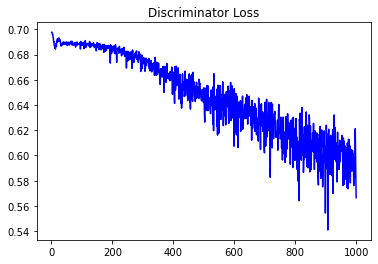

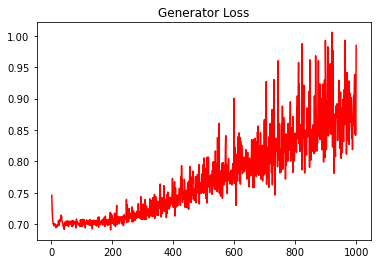

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.4256621323097497


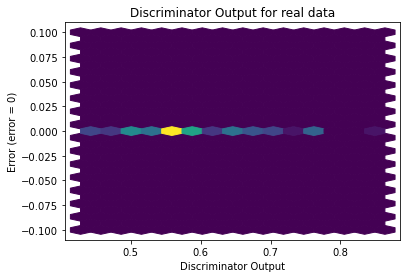

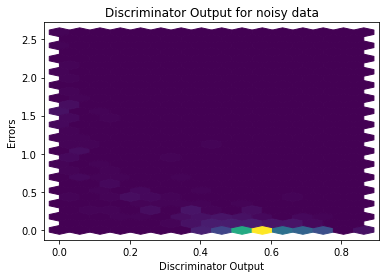

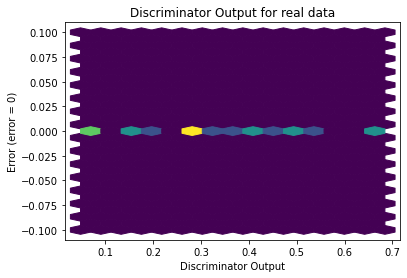

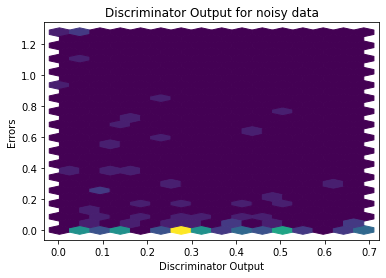

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


In [20]:
# ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [22]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.001, betas=(0.5, 0.999))


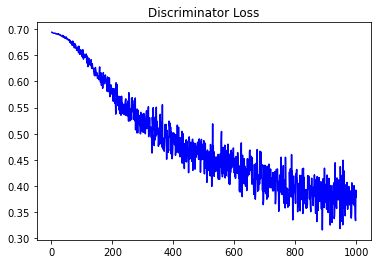

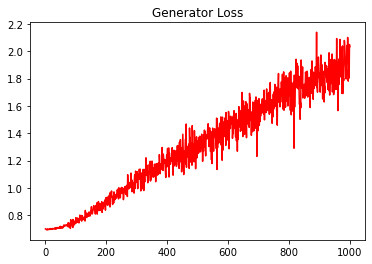

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.27177682423964145


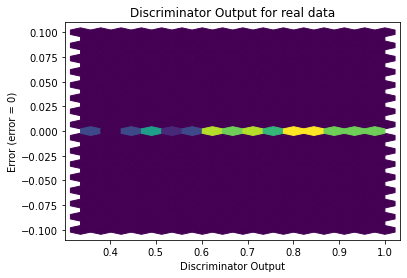

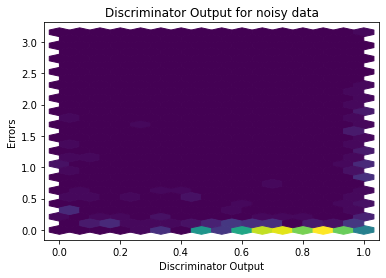

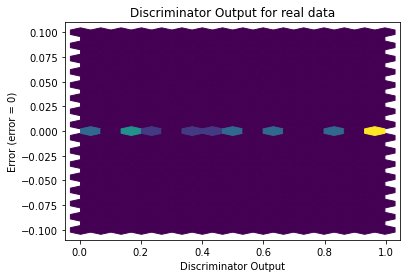

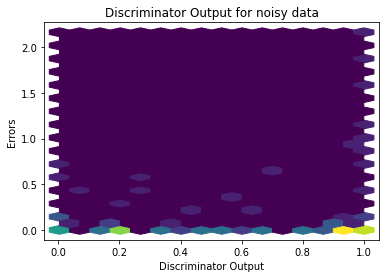

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
